# Preface

In [1]:
import arviz as az
import pandas as pd

from jax import lax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro as npyro
import numpyro.distributions as dist
from numpyro.infer import ELBO, SVI
import numpyro.optim as optim

%config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")

### Code 0.1

In [2]:
print("All models are wrong, but some are useful.")

All models are wrong, but some are useful.


### Code 0.2

In [3]:
x = np.arange(1, 3)
x = x * 10
x = np.log(x)
x = np.sum(x)
x = np.exp(x)
x

DeviceArray(200.00002, dtype=float32)

### Code 0.3

In [4]:
print(np.log(0.01 ** 200))
print(200 * np.log(0.01))

-inf
-921.03406


### Code 0.4

{'a': DeviceArray(-17.579102, dtype=float32), 'b': DeviceArray(3.9324093, dtype=float32)}


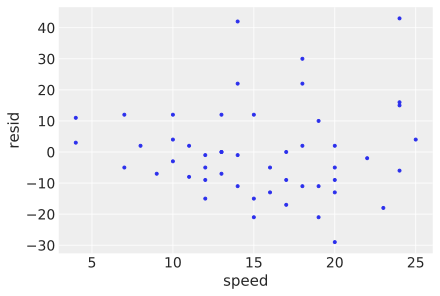

In [5]:
# Load the data:
# car braking distances in feet paired with speeds in km/h
# see cars.info() for details
cars = pd.read_csv("../data/cars.csv", index_col=0)

# fit a linear regression of distance on speed
def model(speed, dist_):
    mu = npyro.param("a", 0.) + npyro.param("b", 1.) * speed
    npyro.sample("dist", dist.Normal(mu, 1), obs=dist_)

svi = SVI(model, lambda speed, dist_: None, optim=optim.Adam(1), loss=ELBO(),
          speed=cars.speed.values, dist_=cars.dist.values)
init_state = svi.init(PRNGKey(0))
state = lax.fori_loop(0, 1000, lambda i, x: svi.update(x)[0], init_state)
params = svi.get_params(state)

# estimated coefficients from the model
print(params)

# plot residuals against speed
resid = cars.dist - (params["a"] + params["b"] * cars.speed.values)
az.plot_pair({"speed": cars.speed, "resid": resid});

### Code 0.5

```sh
pip install numpyro arviz causalgraphicalmodels ete3
```